In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('friends_dataset.csv')
df.head()

,text,label
0,"Oh my God, hes lost it. Hes totally lost it.",non-neutral
1,What?,surprise
2,"Or! Or, we could go to the bank, close our acc...",neutral
3,Youre a genius!,joy
4,"Aww, man, now we wont be bank buddies!",sadness


In [6]:
df['label'].unique()

array(['non-neutral', 'surprise', 'neutral', 'joy', 'sadness', 'anger',
       'disgust', 'fear'], dtype=object)

In [7]:
df = df[df['label'] != 'non-neutral']

In [8]:
len(df)

11731

In [9]:
df.head()

,text,label
1,What?,surprise
2,"Or! Or, we could go to the bank, close our acc...",neutral
3,Youre a genius!,joy
4,"Aww, man, now we wont be bank buddies!",sadness
5,"Now, theres two reasons.",neutral


In [108]:
def a(x):
    if x =='sadness':
        return 'sad'
#     elif x =='anger':
#         return 'angry'
    else:
        return x
    


In [12]:
df.head()

,text,label
1,What?,surprise
2,"Or! Or, we could go to the bank, close our acc...",neutral
3,Youre a genius!,joy
4,"Aww, man, now we wont be bank buddies!",sad
5,"Now, theres two reasons.",neutral


In [13]:
df['label'].unique()

array(['surprise', 'neutral', 'joy', 'sad', 'anger', 'disgust', 'fear'],
      dtype=object)

In [14]:
df.rename(columns={'label' : 'emotion'})

,text,emotion
1,What?,surprise
2,"Or! Or, we could go to the bank, close our acc...",neutral
3,Youre a genius!,joy
4,"Aww, man, now we wont be bank buddies!",sad
5,"Now, theres two reasons.",neutral
...,...,...
14496,"When I first moved to the city, I went out a c...",disgust
14497,It made me nuts.,disgust
14498,You or me?,neutral
14500,"You guys are messing with me, right?",surprise


In [15]:
df.rename(columns = {'text' : 'sentences' , 'label' : 'emotion'},inplace = True)

In [16]:
df.head()

,sentences,emotion
1,What?,surprise
2,"Or! Or, we could go to the bank, close our acc...",neutral
3,Youre a genius!,joy
4,"Aww, man, now we wont be bank buddies!",sad
5,"Now, theres two reasons.",neutral


In [17]:
train_df = df.sample(frac=0.8 , random_state = 42)
valid_df = df.drop(train_df.index).sample(frac=0.5,random_state=42)
test_df = df.drop(train_df.index).drop(valid_df.index)

In [18]:
len(train_df)

9385

In [19]:
len(valid_df)

1173

In [20]:
len(test_df)

1173

In [21]:
test_df.to_csv('friend_test.csv',index=False)

In [23]:
kk = pd.read_csv('friend_test.csv')

In [24]:
kk.head()

,sentences,emotion
0,"Or! Or, we could go to the bank, close our acc...",neutral
1,"Now, theres two reasons.",neutral
2,On the touchy.,neutral
3,"No, I know!",surprise
4,Yeah! Yeah! Yeah! Like-like when Im doing som...,joy


In [25]:
valid_df.to_csv('friend_valid.csv',index=False)
train_df.to_csv('friend_train.csv',index=False)

In [94]:
kkdf = pd.read_csv('emotions_train.csv')
kkdf['label']

0        0
1        0
2        3
3        2
4        3
        ..
15995    0
15996    0
15997    1
15998    3
15999    0
Name: label, Length: 16000, dtype: int64

In [102]:
for emo in kkdf['emotion'].unique():
    print(f'{emo} ')
    print(len(kkdf[kkdf['emotion'] == emo].index.tolist()))

sadness 
4666
anger 
2159
love 
1304
surprise 
572
fear 
1937
joy 
5362


In [34]:
df.rename(columns={'text' : 'sentences'},inplace = True)

In [35]:
df.head()

,sentences,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [36]:
df['emotion'] = df['emotion'].apply(a)

In [37]:
df.head()

,sentences,label,emotion
0,i didnt feel humiliated,0,sad
1,i can go from feeling so hopeless to so damned...,0,sad
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [41]:
df.sample(5).head()

,sentences,label,emotion
11086,i read new risen throne once said cold amp des...,4,fear
1940,i could feel the radiant heat of emanating fro...,1,joy
14189,i generally use this icon when im feeling play...,1,joy
10488,i come out of the cinema feeling like a giggly...,1,joy
9372,i wasnt the only one feeling very pleased abou...,1,joy


In [42]:
df = df[df['emotion'] != 'love']

In [43]:
df.head()

,sentences,label,emotion
0,i didnt feel humiliated,0,sad
1,i can go from feeling so hopeless to so damned...,0,sad
2,im grabbing a minute to post i feel greedy wrong,3,anger
4,i am feeling grouchy,3,anger
5,ive been feeling a little burdened lately wasn...,0,sad


In [44]:
df.to_csv('emotion_nolove_train.csv')

In [45]:
df['emotion'].unique()

array(['sad', 'anger', 'surprise', 'fear', 'joy'], dtype=object)

In [47]:
valid_df = pd.read_csv('emotions_valition.csv')
valid_df.rename(columns={'text' : 'sentences'},inplace = True)
valid_df['emotion'] = valid_df['emotion'].apply(a)
valid_df = valid_df[valid_df['emotion'] != 'love']

valid_df.to_csv('emotion_nolove_valid.csv')

In [109]:
test_df = pd.read_csv('emotions_test.csv')
test_df.rename(columns={'text' : 'sentences'},inplace = True)
test_df['emotion'] = test_df['emotion'].apply(a)
test_df = test_df[test_df['emotion'] != 'love']

test_df.to_csv('emotion_nolove_test.csv')

In [49]:
train_df = pd.read_csv('train_sent_emo_dya.csv')
train_df.head()

,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Old_Dialogue_ID,Old_Utterance_ID,Season,Episode,StartTime,EndTime
0,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,0,0,8,21,"00:16:16,059","00:16:21,731"
1,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,0,1,8,21,"00:16:21,940","00:16:23,442"
2,That I did. That I did.,Chandler,neutral,neutral,0,2,0,2,8,21,"00:16:23,442","00:16:26,389"
3,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,0,3,8,21,"00:16:26,820","00:16:29,572"
4,My duties? All right.,Chandler,surprise,positive,0,4,0,4,8,21,"00:16:34,452","00:16:40,917"


In [52]:
train_df['Emotion'].unique()

array(['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust',
       'anger'], dtype=object)

In [64]:
train_df.rename(columns = {'Utterance' : 'sentences' , 'Emotion' : 'emotion'},inplace = True)


In [55]:
train_df['emotion'] = train_df['emotion'].apply(a)

In [65]:
train_df.head()

,sentences,Speaker,emotion,Sentiment,Dialogue_ID,Utterance_ID,Old_Dialogue_ID,Old_Utterance_ID,Season,Episode,StartTime,EndTime
0,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,0,0,8,21,"00:16:16,059","00:16:21,731"
1,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,0,1,8,21,"00:16:21,940","00:16:23,442"
2,That I did. That I did.,Chandler,neutral,neutral,0,2,0,2,8,21,"00:16:23,442","00:16:26,389"
3,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,0,3,8,21,"00:16:26,820","00:16:29,572"
4,My duties? All right.,Chandler,surprise,positive,0,4,0,4,8,21,"00:16:34,452","00:16:40,917"


In [58]:
train_df['Sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [66]:
len(train_df)

12840

In [69]:
train_df = train_df.drop_duplicates(subset = 'sentences')

In [70]:
len(train_df)

8738

In [71]:
train_df.to_csv('dya_train.csv')

In [76]:

train_df = pd.read_csv('test_sent_emo_dya.csv')
train_df.rename(columns = {'Utterance' : 'sentences' , 'Emotion' : 'emotion'},inplace = True)
train_df['emotion'] = train_df['emotion'].apply(a)
train_df = train_df.drop_duplicates(subset = 'sentences')
train_df.to_csv('dya_test.csv')

In [77]:
train_df[:20]

,sentences,Speaker,emotion,Sentiment,Dialogue_ID,Utterance_ID,Old_Dialogue_ID,Old_Utterance_ID,Season,Episode,StartTime,EndTime
0,Why do all you’re coffee mugs have numbers on ...,Mark,surprise,positive,0,0,0,0,3,19,"00:14:38,127","00:14:40,378"
1,Oh. That’s so Monica can keep track. That way ...,Rachel,angry,negative,0,1,0,1,3,19,"00:14:40,629","00:14:47,385"
2,Y'know what?,Rachel,neutral,neutral,0,2,0,2,3,19,"00:14:56,353","00:14:57,520"
3,Okay.,Ross,neutral,neutral,1,0,2,0,5,16,"00:07:26,446","00:07:27,487"
4,"Ross, didn't you say that there was an elevato...",Rachel,neutral,neutral,1,1,2,1,5,16,"00:07:27,655","00:07:30,574"
5,"Uhh, yes I did but there isn't. Okay, here we go.",Ross,sad,negative,1,2,2,2,5,16,"00:07:30,741","00:07:34,119"
6,"Okay, go left. Left! Left!",Ross,surprise,negative,1,3,2,3,5,16,"00:07:35,413","00:07:37,205"
7,"Okay, y'know what? There is no more left, left!",Rachel,angry,negative,1,4,2,4,5,16,"00:07:39,709","00:07:43,128"
8,"Oh okay, lift it straight up over your head!",Ross,angry,negative,1,5,2,5,5,16,"00:07:43,963","00:07:46,047"
9,Straight up over your head!,Ross,angry,negative,1,6,2,6,5,16,"0:07:46,215","0:07:47,777"


In [92]:


import json
import pandas as pd
from tqdm.notebook import tqdm

# define data type
friends_data = dict(season_id=[],
                    episode_id=[],
                    scene_id=[],
                    utterance_id=[],
                    speaker=[],
                    emotion = [],
                    tokens=[],
                    transcript=[]
                    )
filename = 'emotion-detection-dev'
with open(filename + '.json') as f:
    # load the data from the file
    season = json.load(f)
    season_id = season['season_id']

# read each episode
for episode in season['episodes']:
    episode_id = episode['episode_id']

    # read each scene
    for scene in episode['scenes']:
        scene_id = scene['scene_id']

      # read each utterance
        for utterance in scene['utterances']:
            utterance_id = utterance['utterance_id']
            speaker = utterance['speakers'][0] if utterance['speakers'] else 'unknown'
            friends_data['season_id'].append(season_id)
            friends_data['episode_id'].append(episode_id.split('_')[-1])
            friends_data['scene_id'].append(scene_id.split('_')[-1])
            friends_data['utterance_id'].append(utterance_id.split('_')[-1])
            friends_data['speaker'].append(speaker)
            friends_data['transcript'].append(utterance['transcript'])
            friends_data['emotion'].append(utterance['emotion'].lower())
            friends_data['tokens'].append(utterance['tokens'])

# save dicitonary to data frame
friends_df = pd.DataFrame(friends_data)

friends_df['emotion'] = friends_df['emotion'].apply(a)
friends_df.rename(columns = {'transcript' : 'sentences'},inplace = True)

# save data frame to .tsv
friends_df.to_csv(filename + '.csv', sep=',', index=False)

print('File saved in `friends_transcripts.tsv` !')
# show sample
friends_df.head()

File saved in `friends_transcripts.tsv` !


,season_id,episode_id,scene_id,utterance_id,speaker,emotion,tokens,sentences
0,dev,e15,c01,u001,Rachel Green,neutral,"[[Coffee, .]]",Coffee.
1,dev,e15,c01,u002,Joey Tribbiani,neutral,"[[Thank, you, .]]",Thank you.
2,dev,e15,c01,u003,Rachel Green,neutral,"[[Cappuccino, .]]",Cappuccino.
3,dev,e15,c01,u004,Ross Geller,neutral,"[[Grazie, .]]",Grazie.
4,dev,e15,c01,u005,Rachel Green,neutral,"[[And, a, nice, hot, cider, for, Monica, .]]",And a nice hot cider for Monica.


In [86]:
friends_df['emotion'].unique()

array(['mad', 'neutral', 'joyful', 'scared', 'sad', 'powerful',
       'peaceful'], dtype=object)

In [87]:
def a(df):
    if df == 'joyful':
        return 'joy'
    elif df =='mad':
        return 'angry'
    else:
        return df

friends_df['emotion'].apply(a).head()

0      angry
1    neutral
2        joy
3    neutral
4    neutral
Name: emotion, dtype: object

In [8]:
import matplotlib.pyplot as plt

In [24]:
df[df['emotion']!='love'].head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
4,i am feeling grouchy,3,anger
5,ive been feeling a little burdened lately wasn...,0,sadness


In [35]:
import pandas as pd


filename = 'train_sent_emo_dya.csv'
df = pd.read_csv(filename)



df['Utterance'].head(10)



0    also I was the point person on my company’s tr...
1                     You must’ve had your hands full.
2                              That I did. That I did.
3        So let’s talk a little bit about your duties.
4                               My duties?  All right.
5    Now you’ll be heading a whole division, so you...
6                                               I see.
7    But there’ll be perhaps 30 people under you so...
8                                        Good to know.
9                                We can go into detail
Name: Utterance, dtype: object

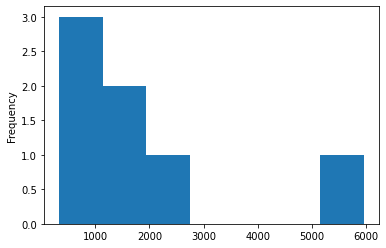

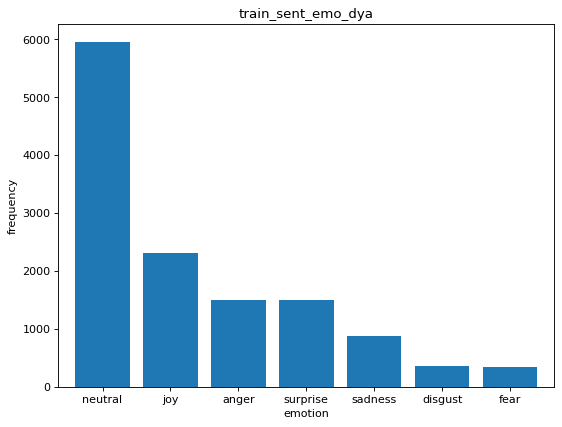

In [29]:
df.rename(columns={'Emotion':'emotion'},inplace=True)
fruit_counts = df[df['emotion']!='love']['emotion'].value_counts()
fruit_counts.plot(kind = 'hist',bins=len(df['emotion'].unique()))

fig = plt.figure(figsize=(8,6), dpi=80)
# Create a bar plot of the fruit counts with a width of 0.8
fruit_counts.plot(kind='bar', width=0.8)

# set the title and labels
plt.title(filename[:-4])
plt.xlabel('emotion')
plt.ylabel('frequency')
plt.setp(plt.gca().get_xticklabels(), rotation=0, ha='center')

# show the plot
plt.show()

In [11]:
fruit_counts

neutral     5214
joy         1363
surprise    1312
anger        605
sad          411
disgust      273
fear         207
Name: emotion, dtype: int64

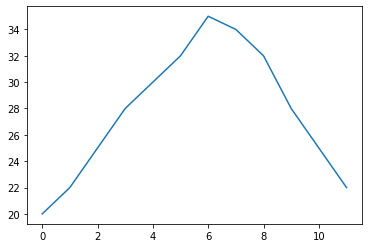

In [36]:
import matplotlib.pyplot as plt
import numpy as np

temperatures = [20, 22, 25, 28, 30, 32, 35, 34, 32, 28, 25, 22]
plt.plot(temperatures)


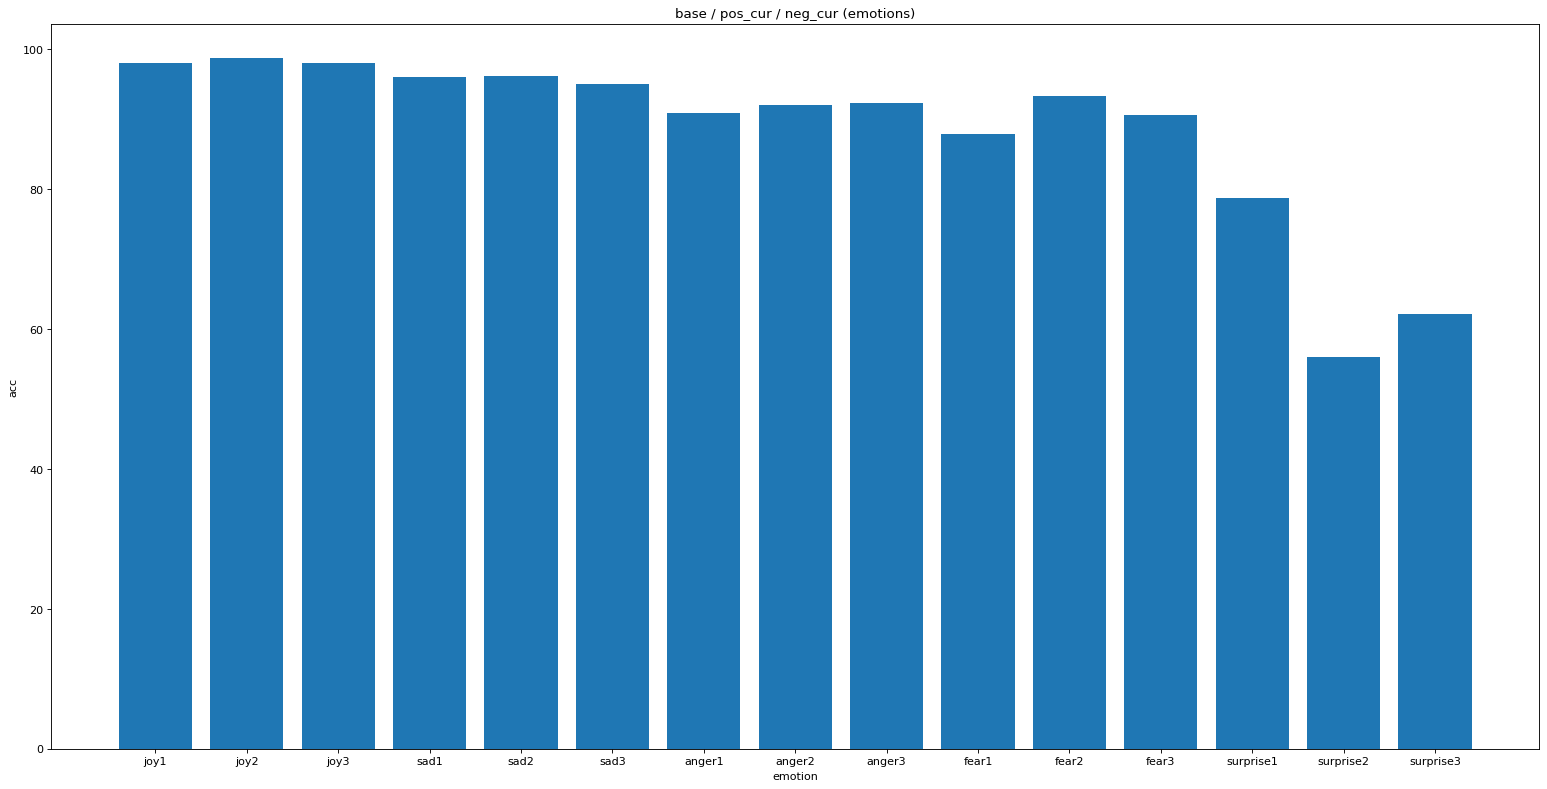

In [62]:
title = 'base / pos_cur / neg_cur (emotions)'
fig = plt.figure(figsize=(24,12), dpi=80)
data = {'joy1': 98.13, 'joy2': 98.71, 'joy3': 98.13 , 'sad1' : 96.04, 'sad2':96.21 , 'sad3':95.01 , 'anger1':90.91,'anger2':92.00
        ,'anger3':92.36,'fear1':87.95 , 'fear2':93.30, 'fear3':90.62 , 'surprise1':78.79,'surprise2':56.06,'surprise3':62.12}
plt.bar(data.keys(), data.values())

plt.xlabel('emotion')
plt.ylabel('acc')
plt.title(title)
plt.show()

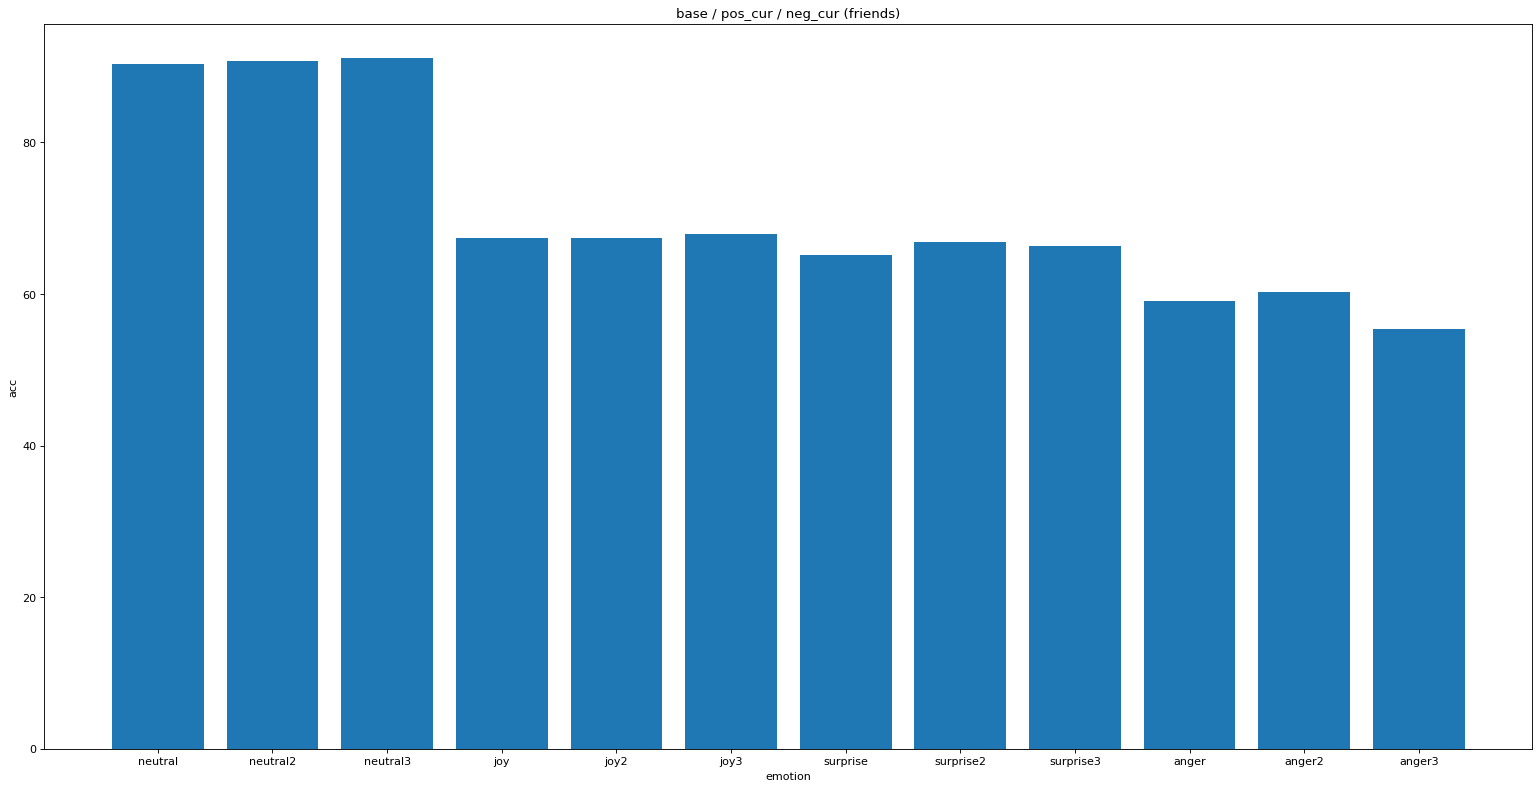

In [64]:
title = 'base / pos_cur / neg_cur (friends)'
fig = plt.figure(figsize=(24,12), dpi=80)
data = {'neutral': 90.28, 'neutral2': 90.75, 'neutral3': 91.07 , 'joy' : 67.39, 'joy2':67.39
        , 'joy3':67.93 , 'surprise':65.19,'surprise2':66.85
        ,'surprise3':66.30,'anger':59.04, 'anger2':60.24, 'anger3':55.42 }#, 'surprise1':78.79,'surprise2':56.06,'surprise3':62.12}
plt.bar(data.keys(), data.values())

plt.xlabel('emotion')
plt.ylabel('acc')
plt.title(title)
plt.show()

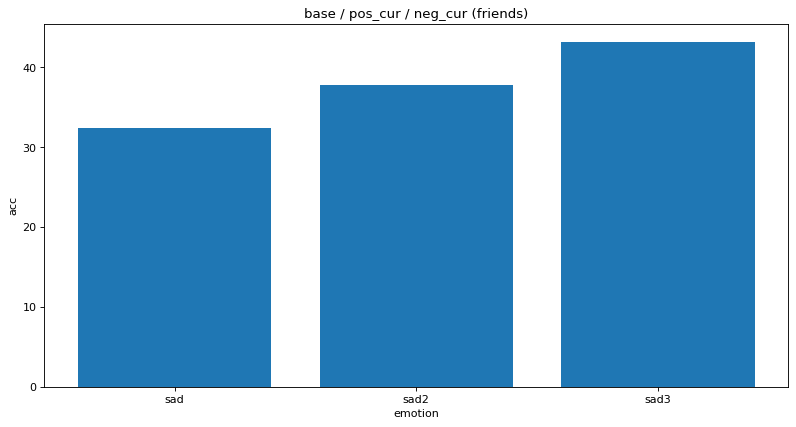

In [68]:
title = 'base / pos_cur / neg_cur (friends)'
fig = plt.figure(figsize=(12,6), dpi=80)
data = {'sad': 32.43, 'sad2': 37.84, 'sad3': 43.24  }#, 'surprise1':78.79,'surprise2':56.06,'surprise3':62.12}
plt.bar(data.keys(), data.values())

plt.xlabel('emotion')
plt.ylabel('acc')
plt.title(title)
plt.show()

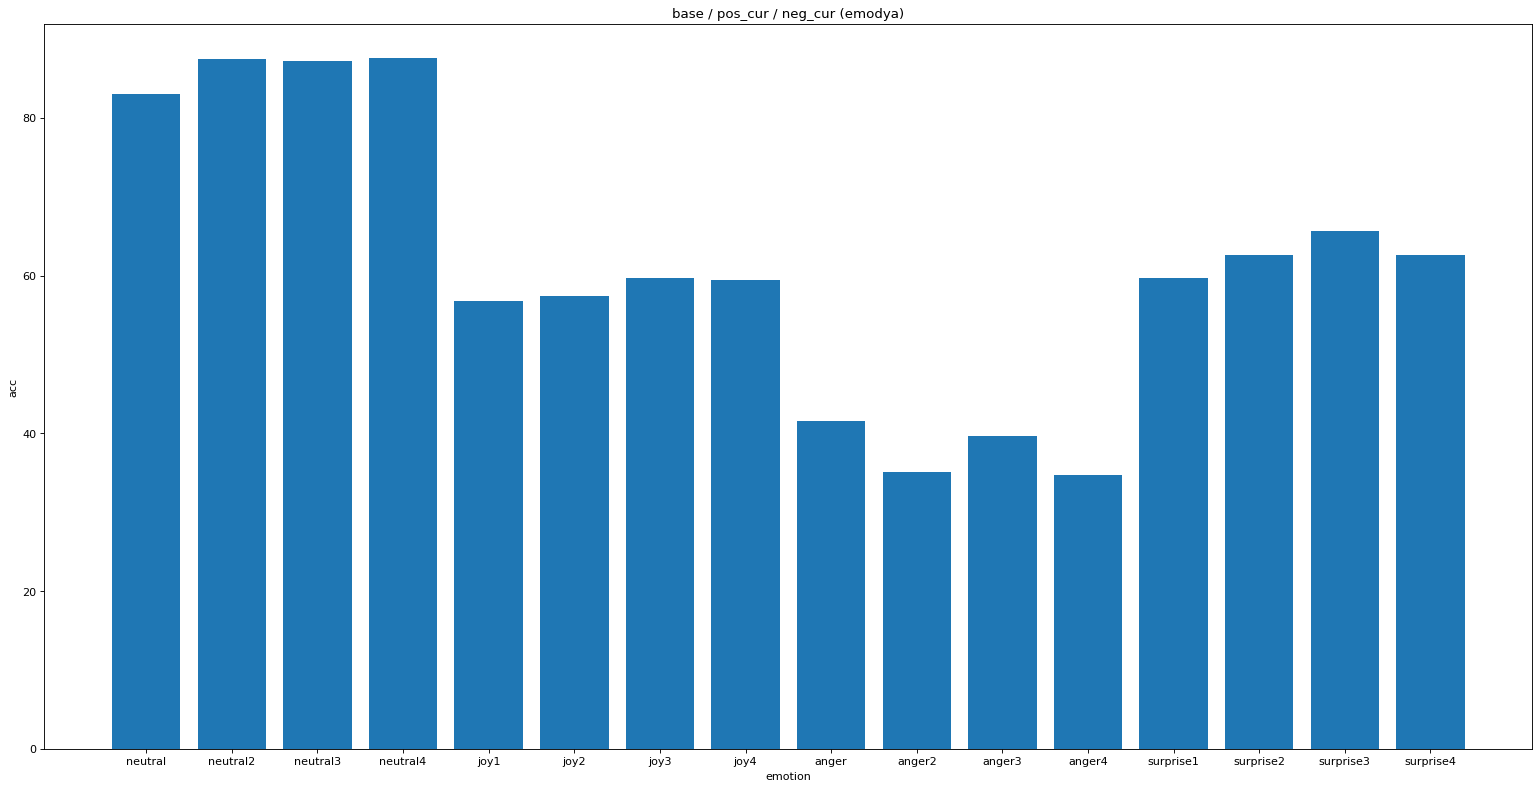

In [70]:
title = 'base / pos_cur / neg_cur (emodya)'
fig = plt.figure(figsize=(24,12), dpi=80)
data = {'neutral': 83.07, 'neutral2': 87.43, 'neutral3': 87.17 , 'neutral4' : 87.52, 
        'joy1':56.76,'joy2':57.35,'joy3':59.71,'joy4':59.41,
         'anger':41.54 , 'anger2':35.08,'anger3':39.69,'anger4':34.77
        ,'surprise1':59.66,'surprise2':62.66, 'surprise3':65.67, 'surprise4':62.66 }#, 'surprise1':78.79,'surprise2':56.06,'surprise3':62.12}
plt.bar(data.keys(), data.values())

plt.xlabel('emotion')
plt.ylabel('acc')
plt.title(title)
plt.show()

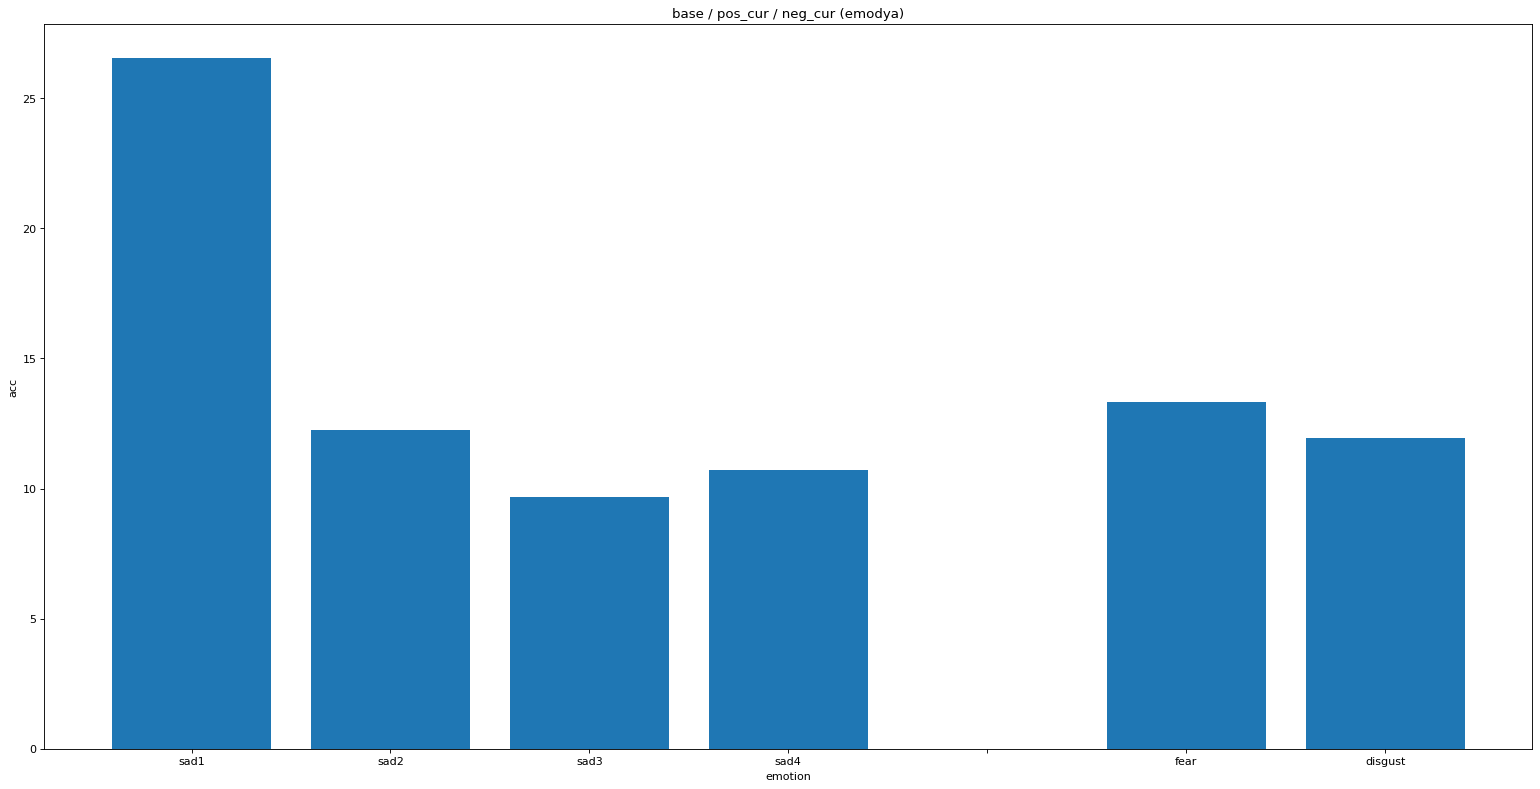

In [71]:
title = 'base / pos_cur / neg_cur (emodya)'
fig = plt.figure(figsize=(24,12), dpi=80)
data = {'sad1': 26.53, 'sad2': 12.24, 'sad3':9.69 , 'sad4' : 10.71, 
        '':0,'fear' : 13.33 , 'disgust' : 11.94 }#, 'surprise1':78.79,'surprise2':56.06,'surprise3':62.12}
plt.bar(data.keys(), data.values())

plt.xlabel('emotion')
plt.ylabel('acc')
plt.title(title)
plt.show()